In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from pandas import Series, DataFrame, Panel

plt.rcParams["figure.figsize"] = (20, 5)

# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html
pd.set_option("display.max_columns", 16)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)

In [2]:
ping = pd.read_csv("data/ping_gateway_plot_data", sep="\t", index_col="timestamp")
ping.index = pd.to_datetime(ping.index, unit="s")
ping.head()

,10.31.0.97
timestamp,
2017-03-05 11:26:22,1000.0
2017-03-05 11:26:27,1000.0
2017-03-05 11:26:32,1000.0
2017-03-05 11:26:37,1000.0
2017-03-05 11:26:42,1000.0


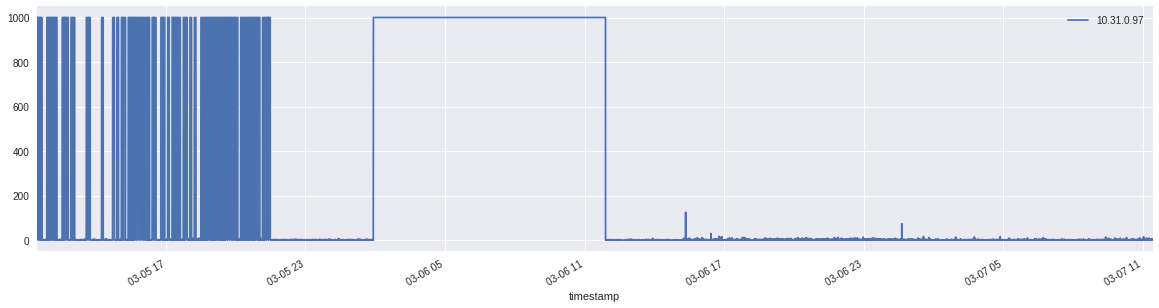

In [3]:
ping.plot() # 1000 means unreachable

In [ ]:
# https://stats.stackexchange.com/questions/41145/simple-way-to-algorithmically-identify-a-spike-in-recorded-errors

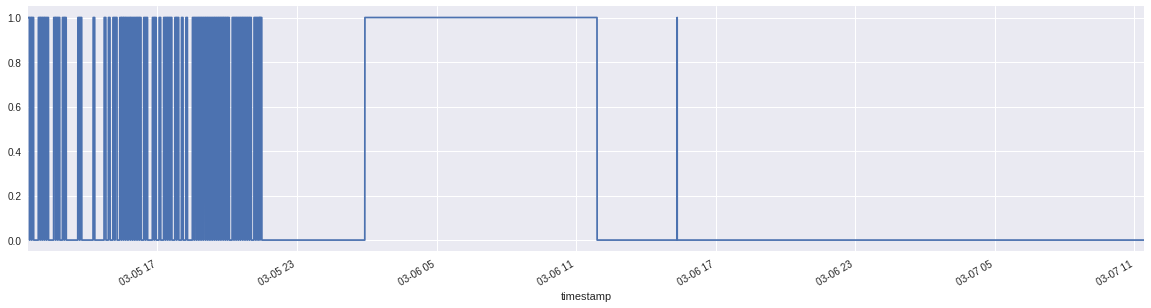

In [4]:
ping_lost = ping["10.31.0.97"] > 100
ping_lost.plot()

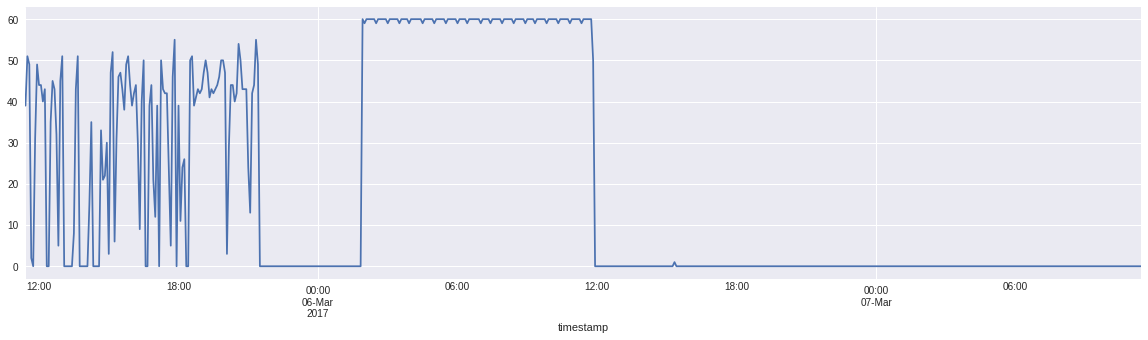

In [6]:
ping_lost.resample("5min").sum().plot()

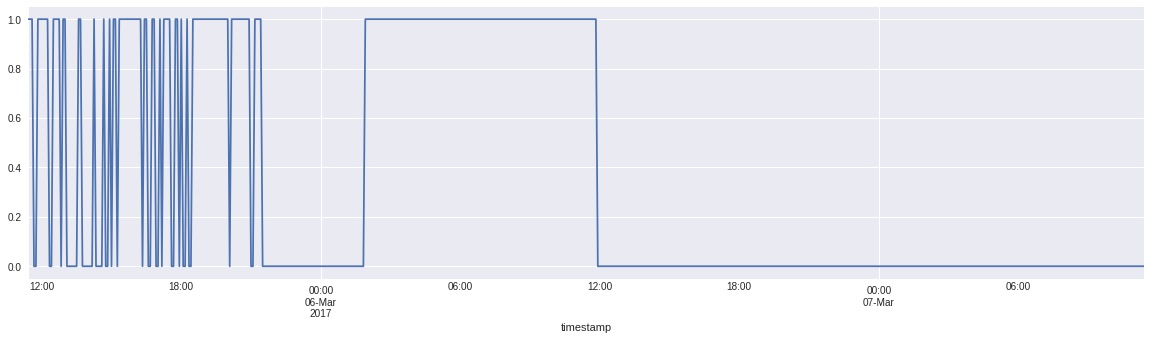

In [5]:
lost = ping_lost.resample("5min").sum().copy()
lost = lost > 25 # define as network ourage if within 5 mins there are 25 points (out of 60) lost
lost.plot()

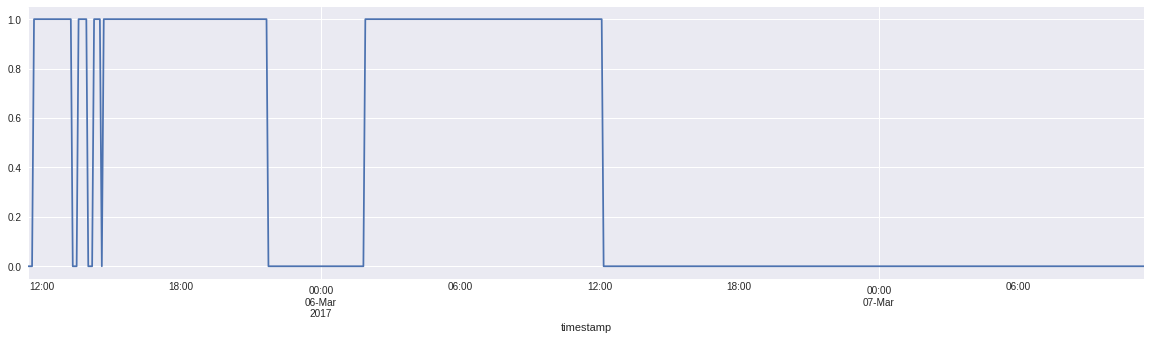

In [7]:
rmean = lost.rolling(window=4).mean()
t = rmean > .2
t.plot(style="-")

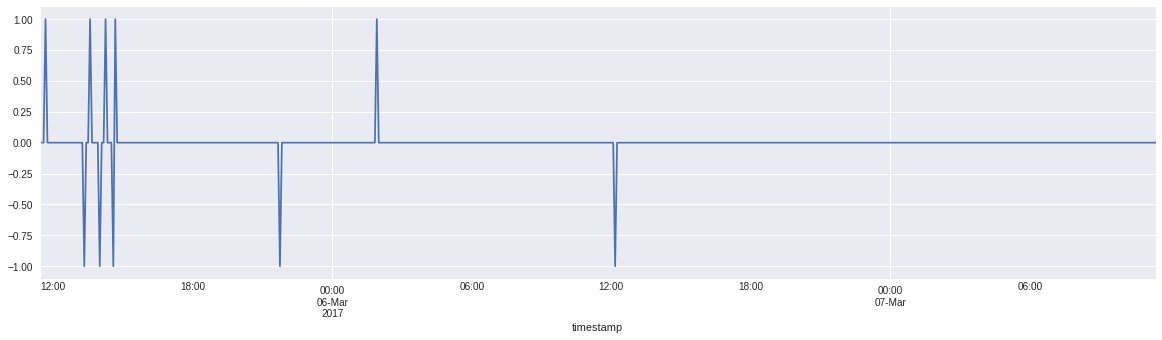

In [8]:
diff = t.astype(int).diff()
diff.plot()

In [9]:
# https://stackoverflow.com/questions/32319726/time-between-events-pandas

begins = diff > 0.1
ends = diff < -.1

starts = diff.loc[begins].index
cutoffs = diff.loc[ends].index
idx = cutoffs.searchsorted(starts)
mask = idx < len(cutoffs)
idx = idx[mask]
begin = starts[mask]
end = cutoffs[idx]

network_outage = pd.DataFrame({'begin':begin, 'end':end})
network_outage

,begin,end
0,2017-03-05 11:40:00,2017-03-05 13:20:00
1,2017-03-05 13:35:00,2017-03-05 14:00:00
2,2017-03-05 14:15:00,2017-03-05 14:35:00
3,2017-03-05 14:40:00,2017-03-05 21:45:00
4,2017-03-06 01:55:00,2017-03-06 12:10:00


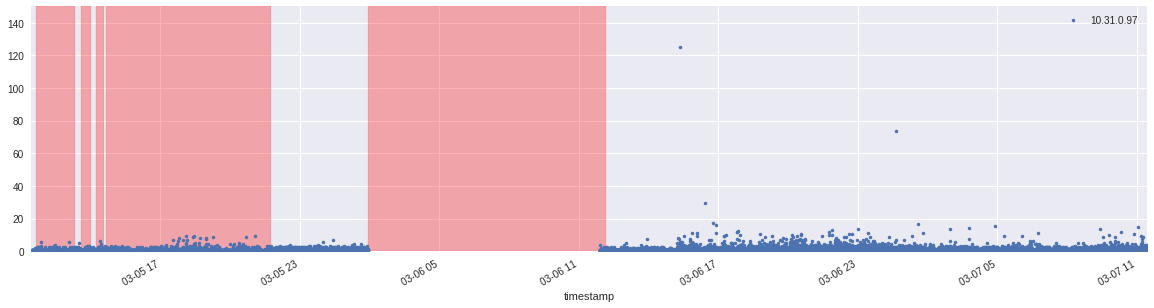

In [10]:
ax = ping.plot(style=".", ylim=(0, 150))
for index, row in network_outage.iterrows():
    ax.axvspan(row["begin"], row["end"], color="red", alpha=.3)